In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Epoch 1/20 Train Loss: 1.6554 Val Loss: 1.4571 Train Acc: 0.3327 Val Acc: 0.4393
Epoch 2/20 Train Loss: 1.3909 Val Loss: 1.2401 Train Acc: 0.4646 Val Acc: 0.5227
Epoch 3/20 Train Loss: 1.2551 Val Loss: 1.0993 Train Acc: 0.5197 Val Acc: 0.5913
Epoch 4/20 Train Loss: 1.1390 Val Loss: 0.9788 Train Acc: 0.5678 Val Acc: 0.6373
Epoch 5/20 Train Loss: 1.0269 Val Loss: 0.8081 Train Acc: 0.6096 Val Acc: 0.7166
Epoch 6/20 Train Loss: 0.9120 Val Loss: 0.6783 Train Acc: 0.6577 Val Acc: 0.7670
Epoch 7/20 Train Loss: 0.7926 Val Loss: 0.5608 Train Acc: 0.7064 Val Acc: 0.8208
Epoch 8/20 Train Loss: 0.6772 Val Loss: 0.4281 Train Acc: 0.7483 Val Acc: 0.8706
Epoch 9/20 Train Loss: 0.5725 Val Loss: 0.3049 Train Acc: 0.7878 Val Acc: 0.9136
Epoch 10/20 Train Loss: 0.4922 Val Loss: 0.2551 Train Acc: 0.8204 Val Acc: 0.9312
Epoch 11/20 Train Loss: 0.4372 Val Loss: 0.1924 Train Acc: 0.8406 Val Acc: 0.9536
Epoch 12/20 Train Loss: 0.3726 Val Loss: 0.1646 Train Acc: 0.8659 Val Acc: 0.9581
Epoch 13/20 Train Loss: 0

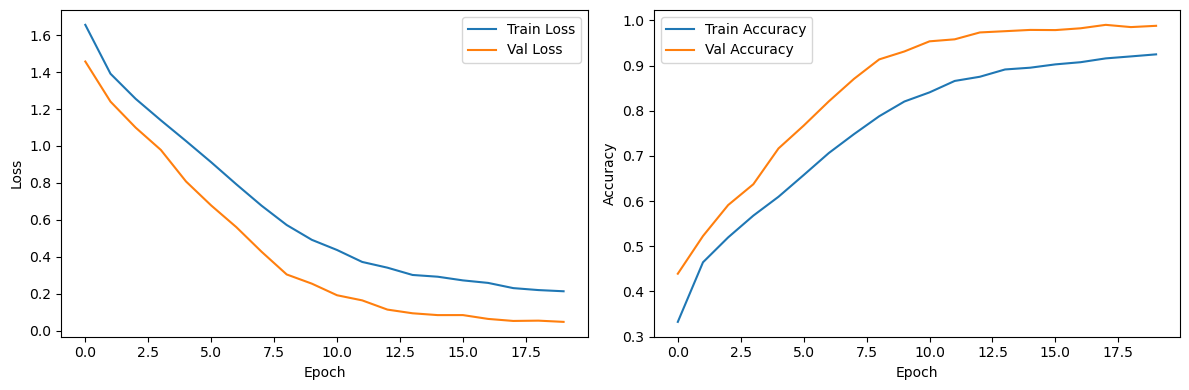

In [2]:
# Define the simplified AlexNet model
class SimpleAlexNet(nn.Module):
    def __init__(self, num_classes=7):
        super(SimpleAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 6 * 6, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 128 * 6 * 6)
        x = self.classifier(x)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = ImageFolder('images_reduced/train', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the model
model = SimpleAlexNet(num_classes=7).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    model.train()
    for images, labels in dataloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(dataloader)
    train_accuracy = correct_train / total_train

    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()

            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(dataloader)
    val_accuracy = correct_val / total_val

    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    train_acc_history.append(train_accuracy)
    val_acc_history.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} Train Loss: {train_loss:.4f} Val Loss: {val_loss:.4f} "
          f"Train Acc: {train_accuracy:.4f} Val Acc: {val_accuracy:.4f}")

# Save the trained model
torch.save(model.state_dict(), 'models/simple_alexnet_model_20epcohs.pth')

# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(val_acc_history, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Test 

Test Accuracy: 0.5522


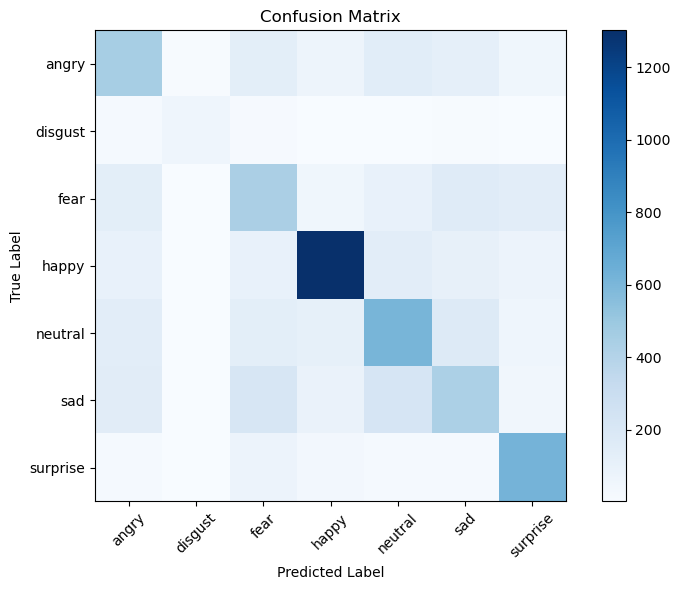

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


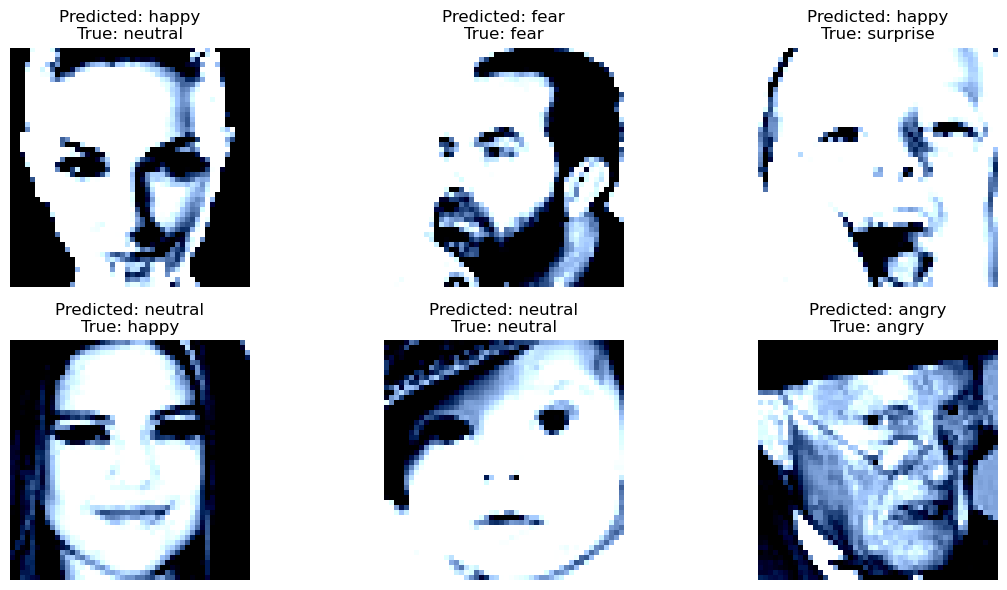

In [3]:
# Load the test dataset
test_dataset = ImageFolder('images/validation', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model
model = SimpleAlexNet(num_classes=7).to(device)

# Load the trained model weights
model.load_state_dict(torch.load('models/simple_alexnet_model_20epcohs.pth'))

# Evaluate the model
model.eval()
total_correct = 0
total_samples = 0
predictions = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.cpu().numpy())
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy:.4f}")

# Convert predictions and labels to numpy arrays
predictions = np.array(predictions)
labels = test_dataset.targets

# Plot a confusion matrix
num_classes = len(test_dataset.classes)
confusion_matrix = np.zeros((num_classes, num_classes))
for i in range(len(predictions)):
    confusion_matrix[labels[i], predictions[i]] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(num_classes), test_dataset.classes, rotation=45)
plt.yticks(np.arange(num_classes), test_dataset.classes)
plt.tight_layout()
plt.show()

# Plot a few example predictions
plt.figure(figsize=(12, 6))
for i in range(6):
    index = np.random.randint(len(predictions))
    image, label = test_dataset[index]
    image = image.permute(1, 2, 0)  # Reshape image tensor for visualization
    predicted_class = test_dataset.classes[predictions[index]]
    true_class = test_dataset.classes[label]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_class}\nTrue: {true_class}')
    plt.axis('off')

plt.tight_layout()
plt.show()
